# Making maps of Japan with japandata.maps

In [10]:
from japandata.maps import load_map

year = 2015  # Will chose the most recent map made up to year
quality = "coarse"  # ['stylized', 'coarse', 'low', 'medium', 'high']
scale = "jp_city_dc "  # ["jp", "jp_pref", "jp_city_dc", "jp_city"] #City DC merges subentities 'designated cities' https://en.wikipedia.org/wiki/Cities_designated_by_government_ordinance_of_Japan
city_dc_map = load_map(date=year, scale="jp_city_dc", quality=quality)

load_map returns a geopandas dataframes

In [11]:
type(city_dc_map)

geopandas.geodataframe.GeoDataFrame

In [12]:
city_dc_map.dtypes

prefecture      object
bureau          object
county          object
city            object
code            object
special         object
geometry      geometry
id              object
dtype: object

## Plot the maps with matplotlib 

In [17]:
import os

import matplotlib.pyplot as plt

filetypes = ["png"]
PLOT_FOLDER = "./maps/"
os.makedirs(PLOT_FOLDER, exist_ok=True)

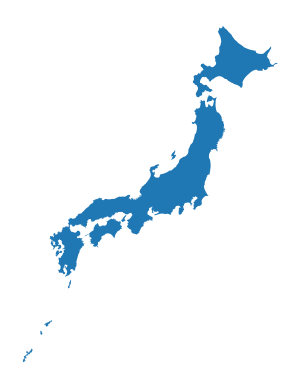

In [18]:
japan_map = load_map(date=2022, scale="jp", quality="stylized")

fig, ax = plt.subplots()
japan_map.plot(ax=ax)
ax.set_axis_off()
for filetype in filetypes:
    fig.savefig(PLOT_FOLDER + "japan." + filetype, transparent=True)

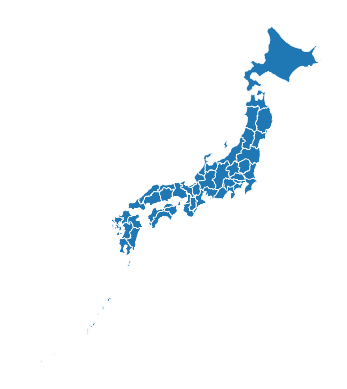

In [19]:
pref_map = load_map(date=2022, scale="jp_pref", quality="stylized")

fig, ax = plt.subplots()
pref_map.plot(ax=ax, edgecolor="w", lw=0.5)
ax.set_axis_off()
for filetype in filetypes:
    fig.savefig(PLOT_FOLDER + "pref." + filetype, transparent=True)

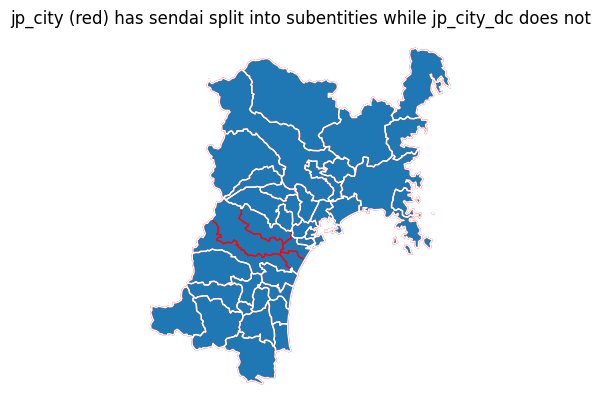

In [24]:
city_map = load_map(date=2022, scale="jp_city", quality="coarse")
miyagi_city = city_map[city_map["prefecture"] == "宮城県"]
city_dc_map = load_map(date=2022, scale="jp_city_dc", quality="coarse")
miyagi_city_dc = city_dc_map[city_dc_map["prefecture"] == "宮城県"]

fig, ax = plt.subplots()
miyagi_city.plot(ax=ax, edgecolor="r", lw=1)
miyagi_city_dc.plot(ax=ax, edgecolor="w", facecolor="none", lw=1)
ax.set_axis_off()
ax.set_title('jp_city (red) has sendai split into subentities while jp_city_dc does not')
for filetype in filetypes:
    fig.savefig(PLOT_FOLDER + "city_dc." + filetype, transparent=True)

In [25]:
plt.close("all")

# Quality comparisons

In [26]:
import os

import matplotlib.pyplot as plt

from japandata.maps import load_map

filetypes = ["png"]
PLOT_FOLDER = "./maps/"
os.makedirs(PLOT_FOLDER, exist_ok=True)

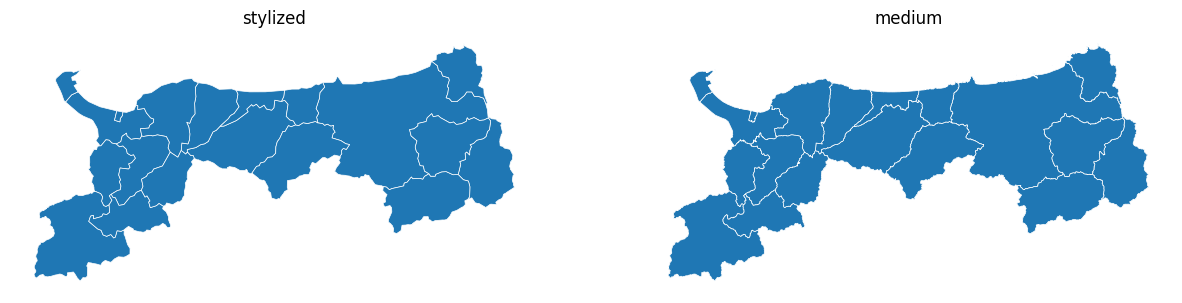

In [27]:
qualities = ["stylized", "medium"]

fig, axes = plt.subplots(nrows=1, ncols=len(qualities), figsize=(15, 10))

for i, quality in enumerate(qualities):
    city_dc_map = load_map(date=2022, scale="jp_city_dc", quality=quality)
    zoom_map = city_dc_map[city_dc_map["prefecture"] == "鳥取県"]
    zoom_map.plot(ax=axes[i], edgecolor="w", lw=0.5)
    axes[i].set_title(quality)
    axes[i].set_axis_off()

In [29]:
# Note that the quality level of stylized is not consistent across years.

# Time Comparisons

In [7]:
import os

import matplotlib.pyplot as plt

from japandata.maps import load_map

filetypes = ["png"]
PLOT_FOLDER = "./maps/"
os.makedirs(PLOT_FOLDER, exist_ok=True)

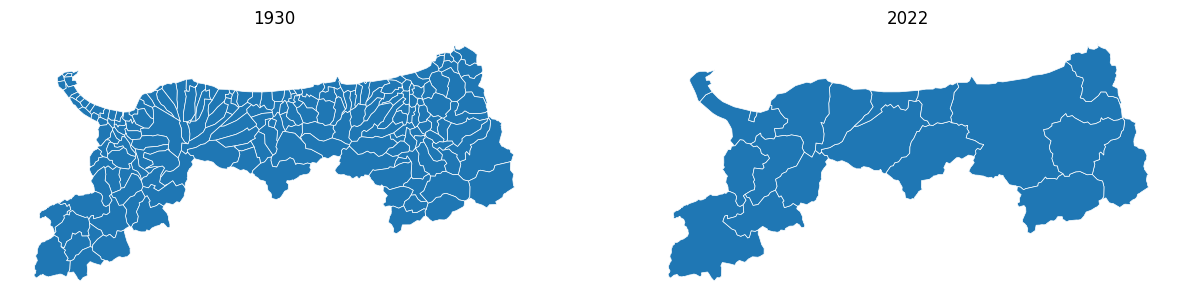

In [8]:
years = ["1930", "2022"]

fig, axes = plt.subplots(nrows=1, ncols=len(qualities), figsize=(15, 10))

for i, year in enumerate(years):
    city_dc_map = load_map(date=year, scale="jp_city_dc", quality="coarse")
    zoom_map = city_dc_map[city_dc_map["prefecture"] == "鳥取県"]
    zoom_map.plot(ax=axes[i], edgecolor="w", lw=0.5)
    axes[i].set_title(year)
    axes[i].set_axis_off()

# Make interactive maps with folium

In [92]:
# !source ../venv/bin/activate && python3 -m pip install folium

In [91]:
import folium
from branca.colormap import linear
from folium.features import GeoJsonTooltip

unhighlighted_style = {
    "color": "black",
    "weight": 1,
    "fillOpacity": 0.2,
}

highlighted_style = unhighlighted_style | {"weight": 4}

map_style = {"location": [35.67, 139], "zoom_start": 5, "tiles": "None", "attr": " "}

m = folium.Map(**map_style)

tooltip = GeoJsonTooltip(
    fields=["prefecture", "code"],
    aliases=["Prefecture:", "Code:"],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)

folium.GeoJson(
    pref_map,
    style_function=lambda feature: unhighlighted_style,
    highlight_function=lambda feature: highlighted_style,
    zoom_on_click=True,
    tooltip=tooltip,
).add_to(m)

m.save(PLOT_FOLDER + "pref_interactive.html")

m

# See the full list of available maps

In [31]:
from japandata.maps import AVAILABLE_MAPS

AVAILABLE_MAPS

- c: coarse
- l: low
- i: medium
- h: high
- s: stylized

Note that a stylized map 's' can always be request even if not in the list above. `japandata.maps` will make one by downsampling a coarse map.

Higher quality 'jp' maps can also be requested. `japandata.maps` will make them joining a prefecture map.

# Random other potentially useful things

In [37]:
# Mapshaper commands to get a nice filtered japan map
# -filter "!['01518', '01519','01517', '01367', '01695', '01696', '01697', '01698','01699', '01700','44322','35305','32528','32525','32526','32527','13421','13361','13362','13363','13364','13381','13382','13401','13402'].includes(N03_007)"
# -clean
# -explode
# -filter-islands min-area 600km2
# -dissolve2
# -clean
# -clean
# -explode
# -filter-islands min-area 200km2
# -dissolve2
# -clean

# Mapshaper commands to get a nice filtered local map
# -filter "!['01518', '01519','01517', '01367', '01695', '01696', '01697', '01698','01699', '01700','44322','35305','32528','32525','32526','32527','13421','13361','13362','13363','13364','13381','13382','13401','13402'].includes(N03_007)"
# -clean
# -filter-islands min-area 600km2
# -clean


### This is how to compute areas. It is very slow

## See https://lemulus.me/column/epsg-list-gis

# local_dc_map_df_max = load_map(2020,'local','high')<br>
# print("The local map at max accuracy reports japan has an area of ", int(local_dc_map_df_max.to_crs(6677).area.sum()/10**6), " square kilometers")<br>
# print("The japan map at lowest accuracy reports japan has an area of ", int(japan_map_df.to_crs(6677).area.sum()/10**6), " square kilometers")<br>
# print("Prefectures map at lowest accuracy reports japan has an area of ", int(pref_map_df.to_crs(6677).area.sum()/10**6), " square kilometers")
